# Lending Club Loan Default Data

We will try to create a classification model that will help Lending Club in deciding if an indvidual would default on repayment or not.

Description of variables available with Data

* loan_amnt	 - The listed amount of the loan applied for by the borrower.
* term- The number of payments on the loan. Values are in months and can be either 36 or 60.
* int_rate	- Interest Rate on the loan
* installment	- The monthly payment owed by the borrower if the loan originates.
* grade	- LC assigned loan grade
* sub_grade	- LC assigned loan subgrade
* emp_title	- The job title supplied by the Borrower when applying for the loan.*
* emp_length	- Employment length in years. 
* home_ownership	- The home ownership status provided by the borrower 
* annual_inc	- The self-reported annual income provided by the borrower during registration.
* verification_status	- Indicates if income was verified by LC, not verified, or if the income source was verified
* issue_d	- The month which the loan was funded
* loan_status -	Current status of the loan
* purpose 	- A category provided by the borrower for the loan request.
* title	 - The loan title provided by the borrower
* zip_code	- The first 3 numbers of the zip code provided by the borrower in the loan application.
* addr_state	- The state provided by the borrower in the loan application
* dti	   - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
* earliest_cr_line	- The month the borrower's earliest reported credit line was opened
* open_acc	- The number of open credit lines in the borrower's credit file.
* pub_rec   	- Number of derogatory public records
* revol_bal	- Total credit revolving balance
* revol_util	- Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* total_acc	- The total number of credit lines currently in the borrower's credit file
* initial_list_status	- The initial listing status of the loan. Possible values are – W, F
* application_type	- Indicates whether the loan is an individual application or a joint application with two co-borrowers
* mort_acc	- Number of mortgage accounts.
* pub_rec_bankruptcies	- Number of public record bankruptcies

In [59]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [60]:
#Importing Data File
df = pd.read_csv('lending_club_loan.csv')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [62]:
# % of missing value 
print('The % of missing values for each feild in the datset are:')
round((df.isnull().sum()/len(df)*100),2).sort_values(ascending = False)

The % of missing values for each feild in the datset are:


mort_acc                9.54
emp_title               5.79
emp_length              4.62
title                   0.44
pub_rec_bankruptcies    0.14
revol_util              0.07
address                 0.00
verification_status     0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
home_ownership          0.00
annual_inc              0.00
purpose                 0.00
issue_d                 0.00
loan_status             0.00
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
total_acc               0.00
initial_list_status     0.00
application_type        0.00
loan_amnt               0.00
dtype: float64

## EDA

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64


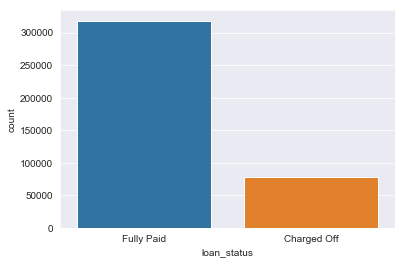

In [63]:
#Target Variable
print(df['loan_status'].value_counts())

sns.countplot('loan_status',data=df)

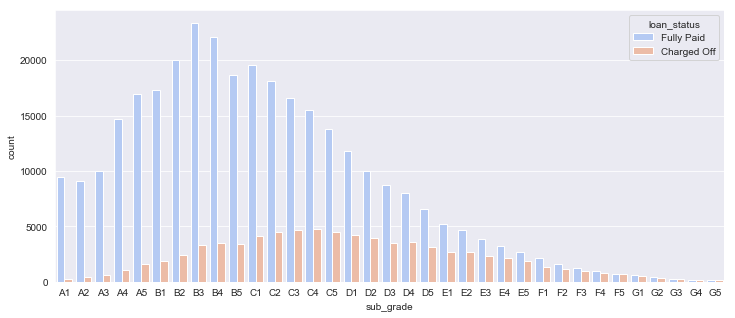

In [64]:
# Sub order vs target varaible

sub_order = sorted(df['sub_grade'].unique())
plt.figure(figsize = (12,5))
sns.countplot(x = 'sub_grade',data = df,order=sub_order,hue = df['loan_status'],palette='coolwarm')

In [65]:
# Exploring 'F' and 'G' sub_grades as the ratio of paid vs unpaid loan is almost equal in these categories
df[(df['grade']=='F') | (df['grade']=='G')].head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
66,15975.0,60 months,24.99,468.80,F,F4,carrier,5 years,MORTGAGE,47000.0,...,10.0,0.0,2049.0,58.5,23.0,w,INDIVIDUAL,1.0,0.0,"59681 Christopher Lock\nNorth Williamtown, UT ..."
87,30000.0,60 months,24.70,875.28,G,G1,Medtronic,5 years,MORTGAGE,187321.0,...,21.0,0.0,54810.0,93.4,52.0,f,INDIVIDUAL,3.0,0.0,"25281 Kevin Neck\nArmstrongton, TN 29597"
96,12625.0,60 months,25.78,376.36,F,F5,Nursing Assistant,7 years,MORTGAGE,43000.0,...,18.0,0.0,19993.0,55.7,31.0,w,INDIVIDUAL,1.0,0.0,"522 Melissa Village\nEast Janice, MT 00813"
97,13400.0,60 months,25.83,399.86,G,G2,DESIGNER,10+ years,MORTGAGE,56000.0,...,23.0,0.0,28845.0,84.5,44.0,w,INDIVIDUAL,6.0,0.0,"0326 Jacob Via\nJacksonstad, MI 93700"
123,30000.0,60 months,23.83,860.09,F,F5,Victorian Senior Care,10+ years,MORTGAGE,72500.0,...,7.0,0.0,6875.0,94.2,32.0,f,INDIVIDUAL,4.0,0.0,"8219 Dennis Station Apt. 722\nBateston, LA 70466"


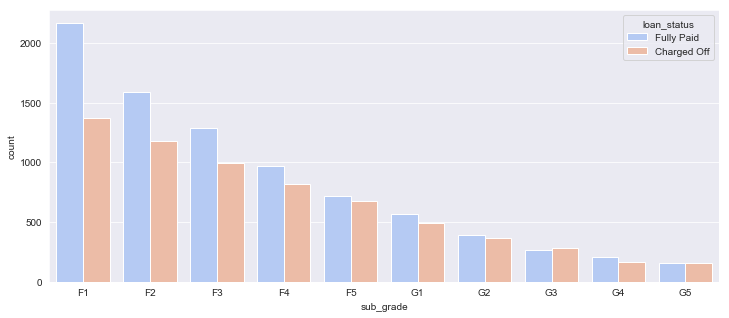

In [66]:
# Zooming in on 'F' and 'G' subsections
df_fg = df[(df['grade']=='F') | (df['grade']=='G')]
sub_order = sorted(df_fg['sub_grade'].unique())
plt.figure(figsize = (12,5))
sns.countplot(x = 'sub_grade',data = df_fg,hue = 'loan_status',order = sub_order,palette='coolwarm')

In [67]:
# Dropping grade as sub grade provides all information from grade
df.drop(columns = 'grade',axis=1,inplace = True)


# Missing Value Imputation

Feature : Mort_acc

In [68]:
print('Unique mort_acc nos',df['mort_acc'].value_counts().count())

Unique mort_acc nos 33


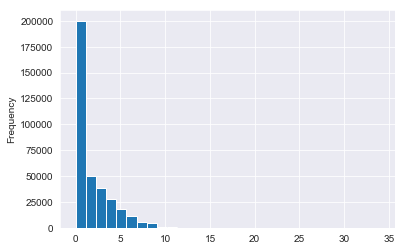

In [69]:
sns.set_style('darkgrid')
df['mort_acc'].plot(kind = 'hist',bins=30)

In [70]:
#Imputing median value for missing information
df['mort_acc'].fillna(value = df['mort_acc'].median(),inplace = True)

Feature : emp_title

In [71]:
# Too many text variables to clean - emp length and income will provide a good profile of an applicant. 
df['emp_title'].value_counts().head()

Teacher             4389
Manager             4250
Registered Nurse    1856
RN                  1846
Supervisor          1830
Name: emp_title, dtype: int64

In [72]:
# Dropping emp_title varaible
df.drop('emp_title', axis=1,inplace = True)

Feature : emp_length

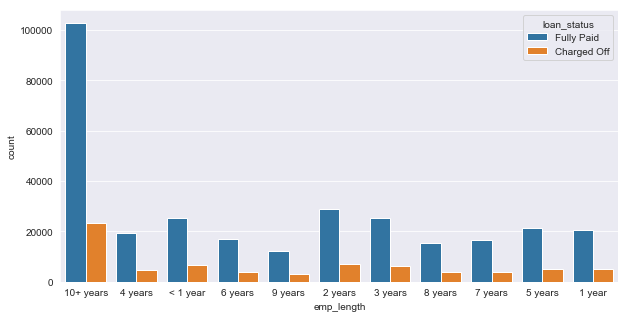

In [73]:
plt.figure(figsize = (10,5))
sns.countplot('emp_length',data = df,hue = 'loan_status')

In [74]:
# Ratio between charged off and fully paid
emp_chrgdof = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_flypd = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

emp_chrgdof/emp_flypd

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

No real variation amongst the years. Safe to presume emp_length does not have much influence on loan_status. We will drop this variable

In [75]:
# Dropping emp_length
df.drop('emp_length',axis=1,inplace = True)

Variable :  pub_rec_bankruptcies

Text(0.5, 1.0, 'pub_rec_bankruptcies')

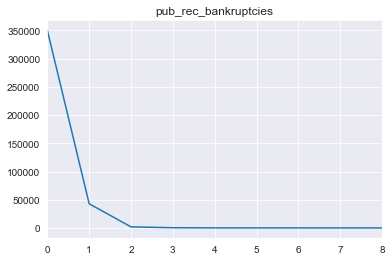

In [76]:
df['pub_rec_bankruptcies'].value_counts().plot()
plt.xlim(0,8)
plt.title('pub_rec_bankruptcies')

Text(0.5, 1.0, 'pub_rec')

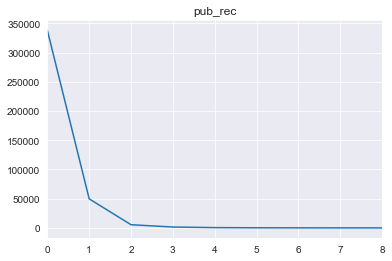

In [77]:
df['pub_rec'].value_counts().plot()
plt.xlim(0,8)
plt.title('pub_rec')

# Feature Engineering


 * Created Zip code variable from address and dropped address. Dummy created for zip code
   
   
 * Engineered a new feild - 'credit_history_age' by subtracting earliest credit line year from current year. 
   
   
 * Turned the following into dummy variables (one hot encoding):
        * home_ownership
        * verification_status
        * purpose
        * initial_list_status
        * application_type
        
 * Dropped the following:
        * title - purpose provides all information required
        * open_acc - all information available in total_acc
        * pub_rec_bankruptcies - pub_rec captures all this data
        * issue_d - to avoid data leakage(we can't have issue date if we don't know the loan status)


In [78]:
# 'pub_rec_bankruptcies' is a subset of 'pub_rec' ; keeping both variables just adds additional noise. 
# We will drop 'pub_rec_bankruptcies

df.drop('pub_rec_bankruptcies',axis=1,inplace = True)

In [79]:
# changing term to integer (removing 'months' text)
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [80]:
# Google tells is that the grades represent risk associated with loan - higher grade,lower interest . 
# We will label encode this variable

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

df['sub_grade'] = lb.fit_transform(df['sub_grade'])

In [81]:
# One hot encoding the home_ownership variable:
home_ownership = pd.get_dummies(df['home_ownership'],drop_first=True)

In [82]:
# Adding to dataframe
df = pd.concat([home_ownership,df],axis=1)

In [83]:
# Dropping home_ownership from datframe
df.drop('home_ownership',axis=1,inplace = True)

In [84]:
# One hot encoding the verification_status feature:
verification_status = pd.get_dummies(df['verification_status'],drop_first=True)

In [85]:
# Adding to dataframe
df = pd.concat([verification_status,df],axis=1)

# Dropping verification_status from datframe
df.drop('verification_status',axis=1,inplace = True)

In [86]:
# One hot encoding for this feature
purpose = pd.get_dummies(df['purpose'],drop_first=True)

In [87]:
# Adding to dataframe
df = pd.concat([purpose,df],axis=1)

# Dropping purpose from datframe
df.drop('purpose',axis=1,inplace = True)

In [88]:
df['title'].value_counts()

Debt consolidation                     152472
Credit card refinancing                 51487
Home improvement                        15264
Other                                   12930
Debt Consolidation                      11608
                                        ...  
IT Mgr Needs to Reduce Debt Balance         1
Debt Destruction                            1
Store card refinance and vacation           1
debt consolidTION                           1
Combine the rest of my bills                1
Name: title, Length: 48817, dtype: int64

In [89]:
#purpose provides a good approximation of title. Dropping 'title' vairble
df.drop('title',axis=1, inplace = True)

In [90]:
#one hot encoding of 'initial_list_status'
initial_list_status = pd.get_dummies(df['initial_list_status'],drop_first=True)

In [91]:
# Adding to dataframe
df = pd.concat([initial_list_status,df],axis=1)

# Dropping intial_list_status from datframe
df.drop('initial_list_status',axis=1,inplace = True)

In [92]:
# one hot encoding of 'application_type'
application_type = pd.get_dummies(df['application_type'],drop_first=True)

In [93]:
# Adding to dataframe
df = pd.concat([application_type,df],axis=1)

# Dropping application_type from datframe
df.drop('application_type',axis=1,inplace = True)

In [94]:
# Extracting 'zip code' from the address feature

In [95]:
# extracting the last valid index for each row using apply-lamda to extract zip code

df_add = df['address'].str.split(' ',expand = True)

df_add['zip'] = df_add.apply(lambda x: x[x.last_valid_index()],axis=1)

In [96]:
#one hot encoding for zip code
zip_d = pd.get_dummies(df_add['zip'],drop_first=True)

In [97]:
# Adding to dataframe
df = pd.concat([zip_d,df],axis=1)

In [98]:
# Removing the address feature
df.drop('address',axis=1,inplace = True)

In [99]:
# Extracting year from credit line
df['year'] = df['earliest_cr_line'].apply(lambda x : int(x.split('-')[1]))

# subtracting from current year to create a new feature ' credit history age'
df['credit_history_age'] =2020 - df['year']

In [100]:
# Dropping earliest_cr_line from datframe
df.drop('earliest_cr_line',axis=1,inplace = True)

In [101]:
# Droping open_acc since it is very similar to total_acc
df.drop('open_acc',axis=1,inplace = True)

In [102]:
# Dropping the date issues column to avoid data leakage
df.drop(['issue_d'],axis=1,inplace = True)

In [123]:
# Dropping the revol_util missing values as # of missing values are very low
df.dropna(inplace = True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395754 entries, 0 to 396029
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   05113               395754 non-null  uint8  
 1   11650               395754 non-null  uint8  
 2   22690               395754 non-null  uint8  
 3   29597               395754 non-null  uint8  
 4   30723               395754 non-null  uint8  
 5   48052               395754 non-null  uint8  
 6   70466               395754 non-null  uint8  
 7   86630               395754 non-null  uint8  
 8   93700               395754 non-null  uint8  
 9   INDIVIDUAL          395754 non-null  uint8  
 10  JOINT               395754 non-null  uint8  
 11  w                   395754 non-null  uint8  
 12  credit_card         395754 non-null  uint8  
 13  debt_consolidation  395754 non-null  uint8  
 14  educational         395754 non-null  uint8  
 15  home_improvement    395754 non-nul

In [125]:
#Label encoding the loan_status label

df['loan_status'] = lb.fit_transform(df['loan_status'])
df['loan_status'].head()

0    1
1    1
2    1
3    1
4    0
Name: loan_status, dtype: int64

# Train Test Split

In [127]:
X = df.drop('loan_status',axis=1).values
y = df['loan_status'].values

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
# 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Fitting the Model

We will be testing our model on the following classifiers:
* XGBoost,
* Random Forest, 
* Decision Tree and 
* Logistic Regression

We will then compare the results and choose the best fit.

In [167]:
# Importing XGBoost,Random Forest, Decision Tree and Logistic Regression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [168]:
# Setting instances
xgb = XGBClassifier()
rfc = RandomForestClassifier(n_estimators=50)
dtree = DecisionTreeClassifier()
log = LogisticRegression(max_iter=10000)

In [169]:
# Fitting all model instances
xgb.fit(X_train,y_train)
rfc.fit(X_train,y_train)
dtree.fit(X_train,y_train)
log.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [171]:
# Predictions
predictions_xgb = xgb.predict(X_test)
predictions_rfc = rfc.predict(X_test)
predictions_dtree = dtree.predict(X_test)
predictions_log = log.predict(X_test)

# Model Evaluation

We will evaluate each model's performance based on the following:
* Classification report
* Confusion matrix

In [172]:
from sklearn.metrics import classification_report,confusion_matrix

In [174]:
print('XGB results')
print('Classification Report')
print(classification_report(y_test,predictions_xgb))
print('Confusion Matrix')
print(confusion_matrix(y_test,predictions_xgb))
print('\n')
print('-'*10)

print('Random Forest results')
print('Classification Report')
print(classification_report(y_test,predictions_rfc))
print('Confusion Matrix')
print(confusion_matrix(y_test,predictions_rfc))
print('\n')
print('-'*10)

print('Decision Tree results')
print('Classification Report')
print(classification_report(y_test,predictions_dtree))
print('Confusion Matrix')
print(confusion_matrix(y_test,predictions_dtree))
print('\n')
print('-'*10)

print('Logmodel results')
print('Classification Report')
print(classification_report(y_test,predictions_log))
print('Confusion Matrix')
print(confusion_matrix(y_test,predictions_log))


XGB results
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.48      0.63     23168
           1       0.89      0.99      0.93     95559

    accuracy                           0.89    118727
   macro avg       0.90      0.73      0.78    118727
weighted avg       0.89      0.89      0.88    118727

Confusion Matrix
[[11137 12031]
 [ 1117 94442]]


----------
Random Forest results
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.47      0.62     23168
           1       0.88      0.99      0.94     95559

    accuracy                           0.89    118727
   macro avg       0.91      0.73      0.78    118727
weighted avg       0.89      0.89      0.87    118727

Confusion Matrix
[[10843 12325]
 [  834 94725]]


----------
Decision Tree results
Classification Report
              precision    recall  f1-score   support

           0       0.56      0.59      0.58    

# Conclusion

There is a close contest between XG booster and Random Forest Classifier - the classification report and confusion matrix is very similar for both.

Total misclassification was
* XGB : (12031+1117) = 13148 ~ 11 less misclassifications than Random Forest
* Random Forest CF : (12325+834) = 13159

However, if Lending Club would want a slightly conservative approach, we should go for Decision Tree Classifier as TypeII error (Predicting loan would be paid back while it wasn't) was higher (1117) even when overall performance was better with XGB.